In [20]:
from sklearn.linear_model import LinearRegression, LassoCV
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
data_housing = pd.read_csv('Clean melb_data.csv')

In [22]:
data_housing.head(5)

,Unnamed: 0,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Melbourne,1,u,436000.0,S,RT,23/04/2016,2.8,3000.0,...,1.0,0.0,0.0,NaN,NaN,Melbourne,-37.8159,144.9720,Northern Metropolitan,17496.0
1,1,Melbourne,1,u,440000.0,S,Harcourts,22/08/2016,2.8,3000.0,...,1.0,1.0,0.0,65.0,1920.0,Melbourne,-37.8168,144.9691,Northern Metropolitan,17496.0
2,2,Melbourne,2,u,520000.0,VB,Greg,19/11/2016,2.8,3000.0,...,1.0,1.0,4051.0,68.0,2005.0,Melbourne,-37.8072,144.9623,Northern Metropolitan,17496.0
3,3,Melbourne,1,u,700000.0,VB,Castran,19/11/2016,2.8,3000.0,...,1.0,1.0,0.0,64.0,1920.0,Melbourne,-37.8157,144.9727,Northern Metropolitan,17496.0
4,4,Melbourne,3,u,610000.0,S,Pagan,18/06/2016,2.8,3000.0,...,2.0,0.0,0.0,NaN,NaN,Melbourne,-37.8114,144.9610,Northern Metropolitan,17496.0


In [23]:
data_housing.describe(include = 'all')

,Unnamed: 0,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13280.000000,13280,13280.00000,13280,1.328000e+04,13280,13280,13280,13280.000000,13280.000000,...,13280.000000,13280.000000,13280.000000,6952.000000,8016.000000,13280,13280.000000,13280.000000,13280,13280.000000
unique,NaN,269,NaN,3,NaN,5,247,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,7,NaN
top,NaN,Reservoir,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara,NaN,NaN,Southern Metropolitan,NaN
freq,NaN,359,NaN,9163,NaN,8815,1565,458,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1254,NaN,NaN,4670,NaN
mean,6639.500000,NaN,2.92131,NaN,1.077056e+06,NaN,NaN,NaN,9.688072,3096.929970,...,1.524699,1.591416,538.055346,144.770442,1964.348428,NaN,-37.808774,144.995308,NaN,7432.246461
std,3833.750122,NaN,0.94533,NaN,6.110923e+05,NaN,NaN,NaN,4.886750,59.663144,...,0.679318,0.959415,3930.342893,129.458588,37.367073,NaN,0.072375,0.096982,NaN,4362.104773
min,0.000000,NaN,1.00000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.114710,144.598640,NaN,389.000000
25%,3319.750000,NaN,2.00000,NaN,6.520000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,171.750000,92.000000,1940.000000,NaN,-37.856200,144.930300,NaN,4380.000000
50%,6639.500000,NaN,3.00000,NaN,9.100000e+05,NaN,NaN,NaN,9.200000,3083.000000,...,1.000000,2.000000,426.000000,125.000000,1970.000000,NaN,-37.802400,144.999665,NaN,6543.000000
75%,9959.250000,NaN,3.00000,NaN,1.338500e+06,NaN,NaN,NaN,12.800000,3146.000000,...,2.000000,2.000000,650.000000,172.000000,1999.000000,NaN,-37.757715,145.056203,NaN,10331.000000


In [24]:
obj_col = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
data_num = data_housing.drop(columns=obj_col)

In [25]:
data_num.describe(include='all')

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13280.000000,13280.00000,1.328000e+04,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,6952.000000,8016.000000,13280.000000,13280.000000,13280.000000
mean,6639.500000,2.92131,1.077056e+06,9.688072,3096.929970,2.895783,1.524699,1.591416,538.055346,144.770442,1964.348428,-37.808774,144.995308,7432.246461
std,3833.750122,0.94533,6.110923e+05,4.886750,59.663144,0.942098,0.679318,0.959415,3930.342893,129.458588,37.367073,0.072375,0.096982,4362.104773
min,0.000000,1.00000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.114710,144.598640,389.000000
25%,3319.750000,2.00000,6.520000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,171.750000,92.000000,1940.000000,-37.856200,144.930300,4380.000000
50%,6639.500000,3.00000,9.100000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,426.000000,125.000000,1970.000000,-37.802400,144.999665,6543.000000
75%,9959.250000,3.00000,1.338500e+06,12.800000,3146.000000,3.000000,2.000000,2.000000,650.000000,172.000000,1999.000000,-37.757715,145.056203,10331.000000
max,13279.000000,7.00000,4.900000e+06,34.900000,3207.000000,7.000000,7.000000,10.000000,433014.000000,6791.000000,2018.000000,-37.568570,145.337380,21650.000000


In [26]:
data_num.drop(columns=['BuildingArea', 'YearBuilt'], inplace=True)

In [27]:
data_num.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13280.000000,13280.00000,1.328000e+04,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000
mean,6639.500000,2.92131,1.077056e+06,9.688072,3096.929970,2.895783,1.524699,1.591416,538.055346,-37.808774,144.995308,7432.246461
std,3833.750122,0.94533,6.110923e+05,4.886750,59.663144,0.942098,0.679318,0.959415,3930.342893,0.072375,0.096982,4362.104773
min,0.000000,1.00000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,-38.114710,144.598640,389.000000
25%,3319.750000,2.00000,6.520000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,171.750000,-37.856200,144.930300,4380.000000
50%,6639.500000,3.00000,9.100000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,426.000000,-37.802400,144.999665,6543.000000
75%,9959.250000,3.00000,1.338500e+06,12.800000,3146.000000,3.000000,2.000000,2.000000,650.000000,-37.757715,145.056203,10331.000000
max,13279.000000,7.00000,4.900000e+06,34.900000,3207.000000,7.000000,7.000000,10.000000,433014.000000,-37.568570,145.337380,21650.000000


In [28]:
corr_data = data_num.corr()
print(corr_data['Price'].sort_values(ascending = False))

Price            1.000000
Rooms            0.520626
Bedroom2         0.505452
Bathroom         0.477875
Unnamed: 0       0.274631
Postcode         0.272617
Car              0.242390
Longtitude       0.218531
Landsize         0.039662
Propertycount   -0.043907
Distance        -0.131147
Lattitude       -0.236645
Name: Price, dtype: float64


In [29]:
X_data = data_num.drop(columns='Price')
Y_data = data_num['Price']
X_train, X_test, Y_Train, Y_test = train_test_split(X_data, Y_data, random_state=42)

In [30]:
reg_model = LinearRegression()
reg_model.fit(
    X=X_train,
    y=Y_Train
)

Y_predicted = pd.Series(reg_model.predict(X_test))

# Model Important values
print("Coefficients:", reg_model.coef_)
print("Mean Squared Error : %.2f" %mean_squared_error(
    y_true= Y_test,
    y_pred= Y_predicted
))
print("Coefficient of determination : %.2f" %r2_score(
    y_true= Y_test,
    y_pred= Y_predicted
))



Coefficients: [ 1.08941306e+02  2.63560506e+05 -5.52082816e+04 -5.34902445e+03
  6.86748028e+04  1.40079253e+05  6.25102264e+04  3.19262763e+00
 -1.52476295e+06  5.75872797e+05 -6.84242365e+00]
Mean Squared Error : 167796063851.97
Coefficient of determination : 0.53


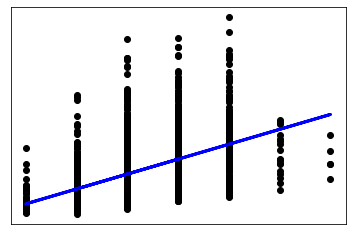

In [31]:
#LINEAR MODEL BY TRAINING ONLY WITH NO. OF ROOMS IN HOUSE

a = X_train.loc[:, X_train.columns.intersection(['Rooms'])]
b = X_test.loc[:, X_test.columns.intersection(['Rooms'])]


model_only_rooms_ols = LinearRegression()
model_only_rooms_ols.fit(a, Y_Train)
Predicted_rooms_ols = model_only_rooms_ols.predict(b)


plt.scatter(
    x = b,
    y = Y_test,
    color = "black"
)
plt.plot(
    b,
    Predicted_rooms_ols,
    color = "blue",
    linewidth = 3
)
plt.xticks(())
plt.yticks(())
plt.show()